In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Data/Salary_Data.csv')

: 

In [ ]:
data.sample(5)

,YearsExperience,Salary
19,6.0,93940.0
20,6.8,91738.0
21,7.1,98273.0
16,5.1,66029.0
22,7.9,101302.0


: 

In [ ]:
data.shape

(30, 2)

: 

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


: 

In [ ]:
print(f'Not a number data:\n{data.isna().any()}\n{data.isna().sum()}')
print(f'\nNull value data:\n{data.isnull().any()}\n{data.isnull().sum()}')

Not a number data:
YearsExperience    False
Salary             False
dtype: bool
YearsExperience    0
Salary             0
dtype: int64

Null value data:
YearsExperience    False
Salary             False
dtype: bool
YearsExperience    0
Salary             0
dtype: int64


: 

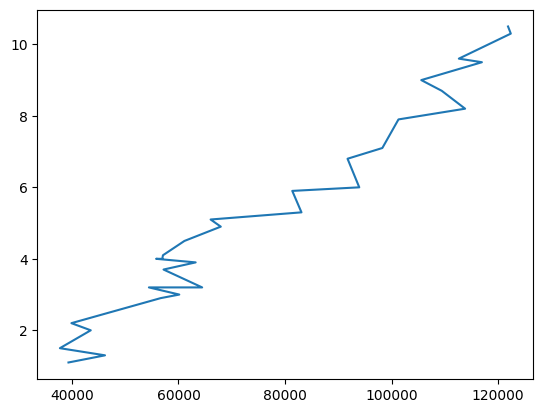

In [95]:
plt.plot(data['Salary'], data['YearsExperience'])

### Finding if there is multi colinearity between the two columns.

<Axes: >

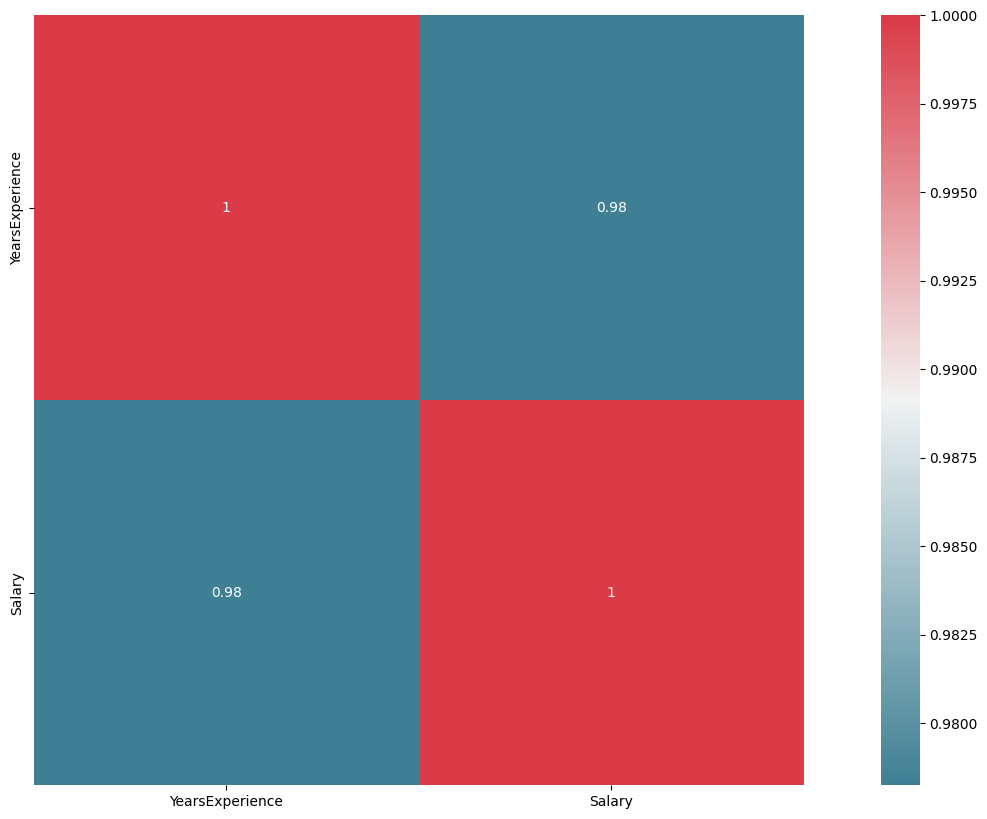

: 

In [ ]:
fig, ax = plt.subplots(figsize= (20, 10))

corr = data.corr('pearson')
sns.heatmap(corr, mask= np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,
            ax=ax,
            annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop('Salary', axis=1)

: 

In [ ]:
x = data.drop('Salary', axis=1)
y = data['Salary']

: 

In [ ]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


: 

In [ ]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

: 

In [79]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size = .2,
                                                random_state = 42)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
regressor = LinearRegression()

In [84]:
regressor.fit(xtrain, ytrain)
# print(xtrain.shape)
# print(ytrain.shape)

LinearRegression()

In [103]:
ytrain_pred = regressor.predict(xtrain)
ytest_pred = regressor.predict(xtest)

In [94]:
print(f'{regressor.score(xtest, ytest):.2f}')

0.90


In [91]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [92]:
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Squared Error (MSE): 49830096.86
Root Mean Squared Error (RMSE): 7059.04
Mean Absolute Error (MAE): 6286.45
R-squared (R2): 0.90


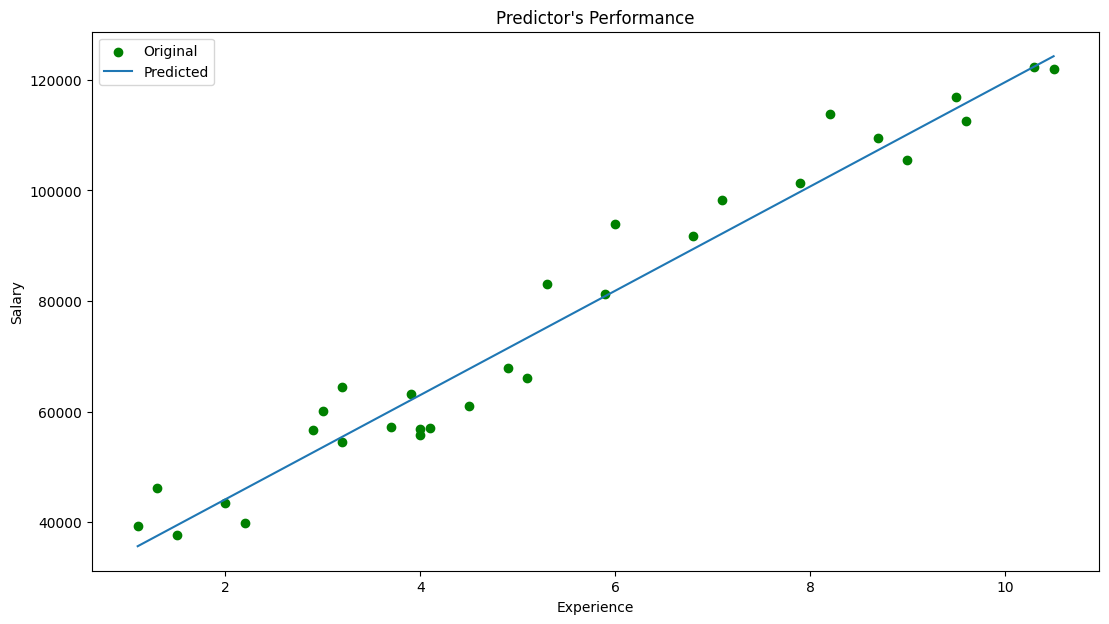

In [124]:
fig, axes = plt.subplots(figsize =(13,7))
axes.set_title("Predictor's Performance")
axes.set_ylabel('Salary')
axes.set_xlabel('Experience')

axes.scatter(x, y, c='g')
axes.plot(x, regressor.predict(x))

axes.legend(['Original', 'Predicted'])
# axes.scatter(xtest, ytest)